In [16]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
This runs the ABM of environmental migration

@author: kelseabest
"""

#import packages
from ABM_model_steps import *

from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import lhsmdu
from smt.sampling_methods import LHS
from joblib import Parallel, delayed

#create latin hypercube 

#lhc_params = lhsmdu.sample(2, 100, randomSeed = 10) 
#lhc_params = np.array(lhc_params)

#trying more specific limits wiht LHS from pyDOE
xlimits = np.array([[500000, 1500000], [25000, 75000]])
sampling = LHS(xlimits=xlimits)
num = 2
lhc_params = sampling(num)


comm_list = [0, 0.05]
mc_runs = 2 #number of runs in MC 


mods = []
for n in range(0, 1):
    N = 700 #number of individual agents
    N_hh = 100 #number of households
    mig_threshold = lhc_params[n, 0] #migration threshold
    mig_util =  lhc_params[n, 1] #utility to migrate
    wealth_factor = 50000 #initialization of wealth factor
    run_time = 20 #steps to run
    decision = "utility" #will also try "push_threshold" here
    env_shock = "shock"
    jobs_avail = 50
    ag_fact = 10000 #10,000 
    for j in comm_list: 
        comm_scale =  j  
        for run in range(0, mc_runs):
            mod = ABM_Model(run_time, N_hh, N, decision, mig_util, mig_threshold, wealth_factor, ag_fact, comm_scale, env_shock, jobs_avail)
            mods.append(mod)
            Household.next_uid = 1
            Individual.next_uid = 1


def parallel_parser(model):
    while (model.tick < model.ticks):
        model.model_step()
        model.data_collect()
        model.tick_up()
         
    last_data = model.last 

    return last_data
    

df = pd.DataFrame(columns = ['hh_id', 'migrations',
                                'wealth', 'num_shocked', 
                                'wtp', 'wta', 'found_work', 
                                'tick', 'ag_fac',
                                'mig_util', 'mig_threshold',
                                'comm_scale'])

results = Parallel(n_jobs=50)(delayed(parallel_parser)(mod) for mod in mods)

for d in results:
    df = df.append(d)
#results = np.ravel(results) 

#results.to_csv("lhs_results_test.csv")
df


,hh_id,migrations,wealth,num_shocked,wtp,wta,found_work,tick,ag_fac,mig_util,mig_threshold,comm_scale
0,1,0,0.000000,0,16677.801246,14703.160394,4023,19,10000,37500.0,1250000.0,0
0,2,0,0.000000,0,17785.588612,5325.580138,4023,19,10000,37500.0,1250000.0,0
0,3,0,0.000000,0,17606.154912,6296.091781,4023,19,10000,37500.0,1250000.0,0
0,4,0,0.000000,0,18301.908078,814.418023,4023,19,10000,37500.0,1250000.0,0
0,5,0,0.000000,0,15946.078399,8235.735556,4023,19,10000,37500.0,1250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
0,96,0,239346.438628,0,18112.391763,13813.050351,4035,19,10000,37500.0,1250000.0,0.05
0,97,1,701987.580174,0,17975.208314,9156.699396,4035,19,10000,37500.0,1250000.0,0.05
0,98,0,0.000000,0,18039.405111,16975.565675,4035,19,10000,37500.0,1250000.0,0.05
0,99,0,0.000000,0,15045.288279,9103.401427,4035,19,10000,37500.0,1250000.0,0.05


In [28]:
import matplotlib.pyplot as plt
import numpy as np

age = np.random.weibull(1.68) * 33.6
age

21.342839954818317

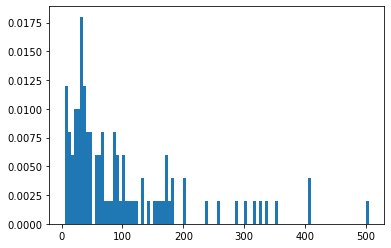

In [30]:
size = np.random.lognormal(4, 1, 100)
count, bins, ignored = plt.hist(size, 100, density=True, align='mid')